# Interaction energy between an asymmetric charge and a symmetric charge

Figure X shows the effect of charge asymmetry and ionic strength on the electrostatic interaction, $u$, between two net-negatively charged particles. In the case of full charge symmetry (a=0), the particles always repel (u>0) and this is reduced by added salt due to electrostatic screening. Introducing charge asymmetry (a>0), while keeping a constant net-charge, the interaction now encompasses a repulsive ($q\leftrightarrow q_1$) and an attractive contribution ($q\leftrightarrow q_2$).
This leads to an overall electrostatic attraction at low to intermediate salt concentrations, which is screened away at high salt. 

This simplified model is consistent with our experimental findings, and also explain anomalous salt effects on like-charged peptide-peptide (https://doi.org/10/xqw) and protein-protein interactions (https://doi.org/10.1021/mp5002334 and https://doi.org/10/bm2d). While this analysis neglects thermal averaging over angular space of the asymmetric molecule, the same qualitative picture emerges using a multipole expansion where orientational averaging is explicitly accounted for (https://doi.org/10.1021/jp013685d).


## Figure caption

Electrostatic energy between two equally net charged ($q$) particles, one with a charge asymmetry described by a charge separation, $a$, whereby the electrostatic energy in an aqueous 1:1 salt solution can be approximated by,
$
u = \frac{q}{4\pi\varepsilon_0\varepsilon_r R} \left (
q_1e^{-R/D} + q_2\frac{e^{-(R-a)/D}}{1-a/R}
\right )
$ where
$q=q_1+q_2=-5e$; $q_2=-q/2$; $D=3.04/I^{1/2}$ is the Debye length in water at 298 K; and $I$ is the molar ionic strength. The two particles are separated by $R=2$ nm which is a resonable choice for the studied system.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from cycler import cycler

matplotlib.rcParams["axes.prop_cycle"] = cycler(color="bgrcmyk")
matplotlib.rcParams.update({"font.size": 20})

In [2]:
def U(c, q, R, a):
    """pair potential"""
    D = 3.04 / np.sqrt(c) # Debye length (Å)
    q1 = q * 3 / 2
    q2 = -q / 2
    print(q1, q2, q1 + q2, q)
    return 7 * (q * q1 / R * np.exp(-R / D) + q * q2 / (R - a) * np.exp(-(R - a) / D))

-7.5 2.5 -5.0 -5
-7.5 2.5 -5.0 -5
-7.5 2.5 -5.0 -5


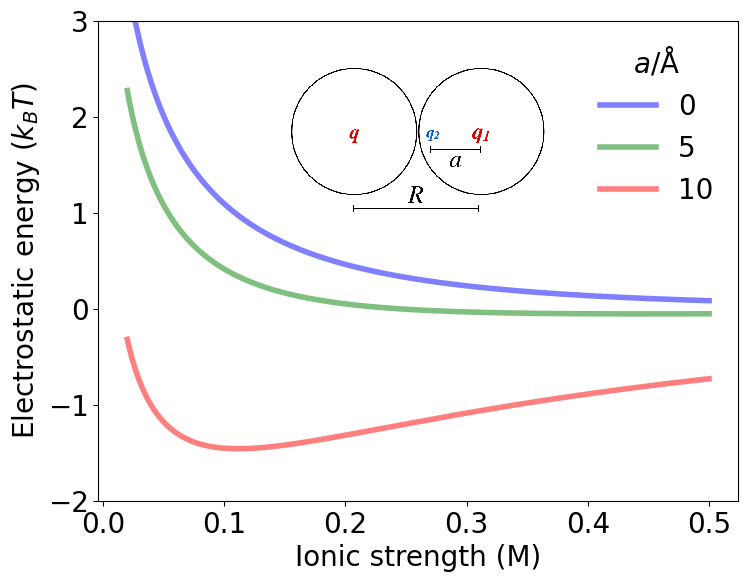

In [3]:
R = 20
q = -5
ax2 = plt.axes([0, 0, 1, 1])
c = np.linspace(0.02, 0.5, 500)
arange = np.array([0, 5, 10])
# ax2.set_xlim([c.min(), c.max()])
ax2.set_ylim(-2, 3)
# ax2.plot([c.min(),c.max()], [0,0], 'k--', alpha=0.6)
for a in arange:
    ax2.plot(c, U(c=c, q=q, R=R, a=a), label=str(a), lw=4, alpha=0.5)
ax2.set_ylabel("Electrostatic energy ($k_BT$)")
ax2.set_xlabel("Ionic strength (M)")
ax2.legend(frameon=False, title=r"$a$/Å", ncol=1, loc=0)
ax1 = plt.axes([0.3, 0.55, 0.4, 0.4])
ax1.axis("off")
img = matplotlib.image.imread("model.png")
ax1.imshow(img, interpolation="none", resample=True)
# ax2.set_title(r'$R=20$ Å, $q=q_1+q_2=-5e$')
plt.savefig("asymmetric.pdf", bbox_inches="tight")  # , dpi=300)